# Importing Libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Calling dataset using pandas

In [2]:
data = pd.read_csv("cardio_train.csv", delimiter=";")

In [3]:
data.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1


In [4]:
data.shape

(69301, 13)

In [5]:
data.info()             #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
data.dtypes         #data type inthe dataset

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [7]:
data.describe()       #describing the dataset statistically

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.isnull().sum()     # checking null values 

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
data.corr()     # checking corelations

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003587,0.003773,-0.003735,-0.001549,0.003268,-0.002757,0.006400,0.002543,-0.003294,0.000384,0.002700,0.004269
age,0.003587,1.000000,-0.023150,-0.081304,0.054409,0.020663,0.017717,0.154343,0.099095,-0.047680,-0.029435,-0.009926,0.238095
gender,0.003773,-0.023150,1.000000,0.499373,0.155649,0.005980,0.015396,-0.036335,-0.021154,0.337608,0.171015,0.006241,0.008592
height,-0.003735,-0.081304,0.499373,1.000000,0.290333,0.005492,0.006215,-0.050632,-0.018929,0.187899,0.094164,-0.005974,-0.011015
weight,-0.001549,0.054409,0.155649,0.290333,1.000000,0.030665,0.043652,0.141901,0.107255,0.068304,0.067259,-0.016514,0.182094
ap_hi,0.003268,0.020663,0.005980,0.005492,0.030665,1.000000,0.015919,0.023573,0.011821,-0.000933,0.001385,0.000032,0.054211
ap_lo,-0.002757,0.017717,0.015396,0.006215,0.043652,0.015919,1.000000,0.024023,0.010895,0.004948,0.010764,0.004962,0.065290
cholesterol,0.006400,0.154343,-0.036335,-0.050632,0.141901,0.023573,0.024023,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752
gluc,0.002543,0.099095,-0.021154,-0.018929,0.107255,0.011821,0.010895,0.451741,1.000000,-0.004608,0.011442,-0.007301,0.089062
smoke,-0.003294,-0.047680,0.337608,0.187899,0.068304,-0.000933,0.004948,0.010237,-0.004608,1.000000,0.339709,0.025794,-0.015225


# x,y Split 

In [10]:
x=data.iloc[:,:-1]
x.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,988,22469,1,155,69.0,130,80,2,2,0,0,1
1,989,14648,1,163,71.0,110,70,1,1,0,0,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1
3,991,14549,2,165,85.0,120,80,1,1,1,1,1
4,992,23393,1,155,62.0,120,80,1,1,0,0,1


In [11]:
y=data.iloc[:,-1]
y.head()

0    0
1    1
2    0
3    0
4    0
Name: cardio, dtype: int64

In [12]:
data.skew()   #checking Skewness

id             -0.001317
age            -0.307388
gender          0.631203
height         -0.634040
weight          1.005120
ap_hi          84.886144
ap_lo          32.101546
cholesterol     1.587480
gluc            2.397520
smoke           2.907579
alco            3.951845
active         -1.531525
cardio          0.001645
dtype: float64

In [13]:
data['ap_hi'].skew()

84.88614414413018

In [14]:
ap_hi= np.log(data['ap_hi'])

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
ap_hi.skew()

-2.326455478053465

In [16]:
#standard scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.73243929,  1.21601824, -0.73302344, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [-1.73240428, -1.95391548, -0.73302344, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [-1.73236927,  0.98580185, -0.73302344, ..., -0.31072844,
        -0.23864069,  0.49376463],
       ...,
       [ 1.7338761 , -0.16325352,  1.36421285, ..., -0.31072844,
         4.19040018, -2.02525646],
       [ 1.73394612,  1.20061644, -0.73302344, ..., -0.31072844,
        -0.23864069, -2.02525646],
       [ 1.73398113,  0.43417421, -0.73302344, ..., -0.31072844,
        -0.23864069,  0.49376463]])

In [17]:
#min max scaler
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
x=mns.fit_transform(x)
x

array([[0.00000000e+00, 9.03677894e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00998879e-05, 2.98102981e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.01997758e-05, 8.59698026e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [9.99969700e-01, 6.40185830e-01, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.99989900e-01, 9.00735579e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 7.54316686e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

# EDA

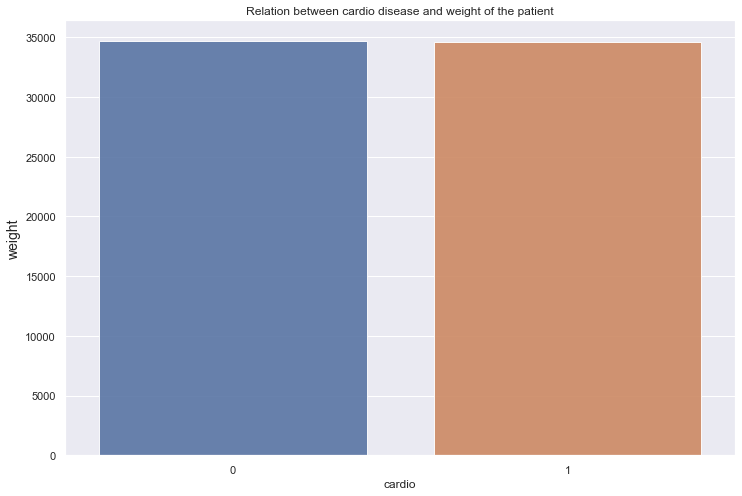

In [18]:
plt.figure(figsize=(12, 8))
JobRole_count = data['cardio'].value_counts()
sns.set(style="darkgrid")
sns.barplot(JobRole_count.index, JobRole_count.values, alpha=0.9)
plt.title('Relation between cardio disease and weight of the patient')
plt.ylabel('weight', fontsize=14)
plt.xlabel('cardio', fontsize=12)
plt.show()

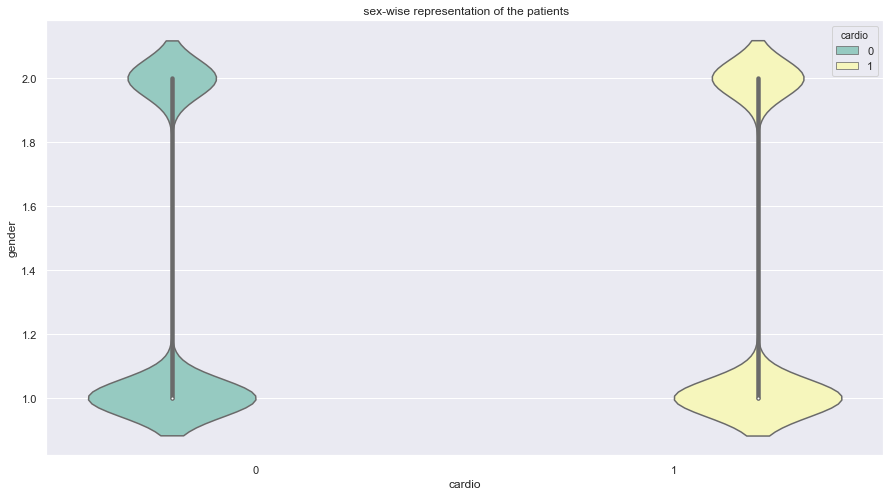

In [19]:
fig, ax = plt.subplots(figsize=(15, 8))  
sns.violinplot(y='gender', x='cardio', hue='cardio', data=data, ax=ax, palette="Set3")  
ax.set_title(' sex-wise representation of the patients')  
plt.show() 

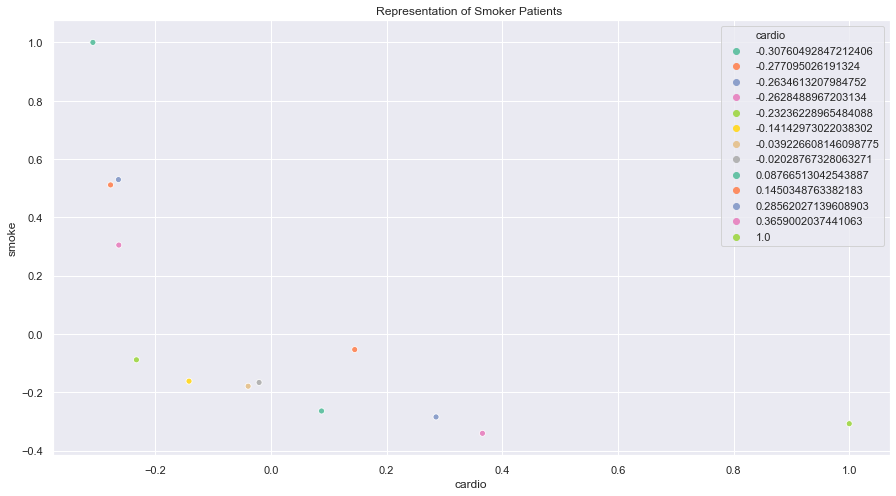

In [76]:
fig, ax = plt.subplots(figsize=(15, 8))  
sns.scatterplot(y='smoke', x='cardio', hue='cardio', data=data, ax=ax, palette="Set2")  
ax.set_title('Representation of Smoker Patients ')  
plt.show() 

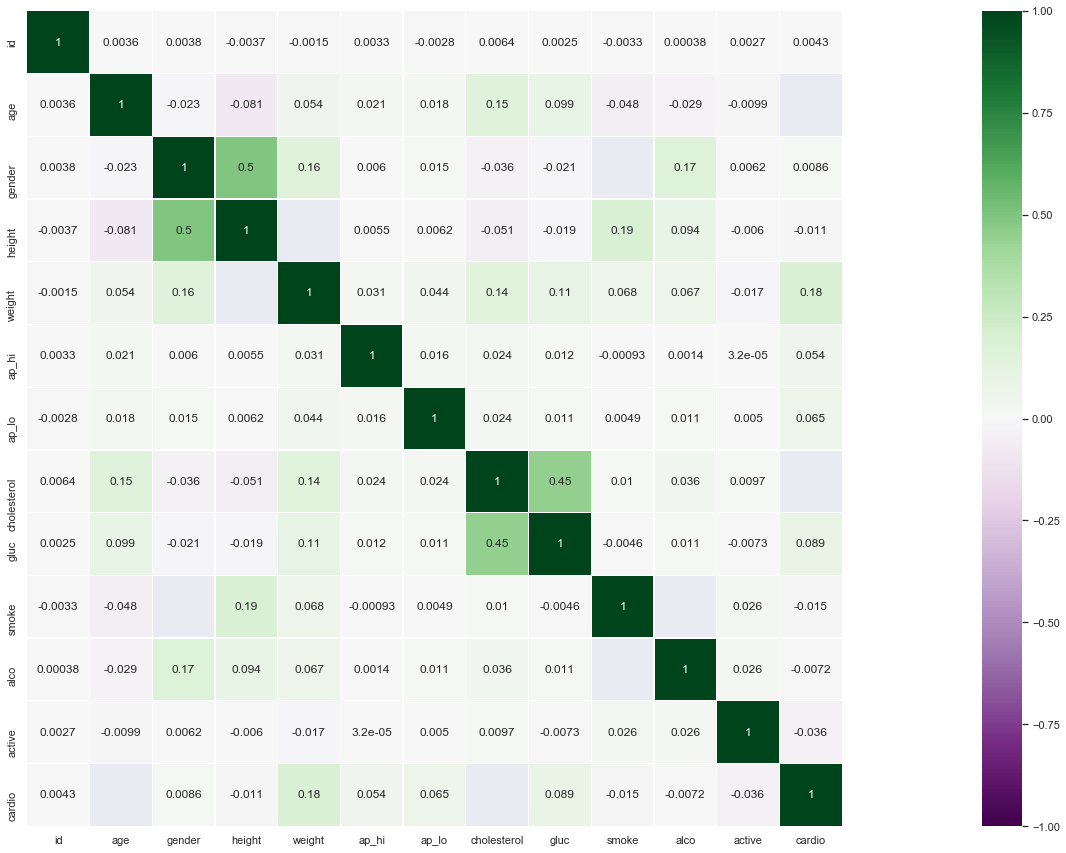

In [20]:
data = data.corr()

plt.figure(figsize=(50, 15))

sns.heatmap(data[(data >= 0.4) | (data <= 0.2)], 
            cmap='PRGn', vmax=1.0, vmin=-1.0, linewidths=0.2,
            annot=True, annot_kws={"size": 12}, square=True)
plt.show()

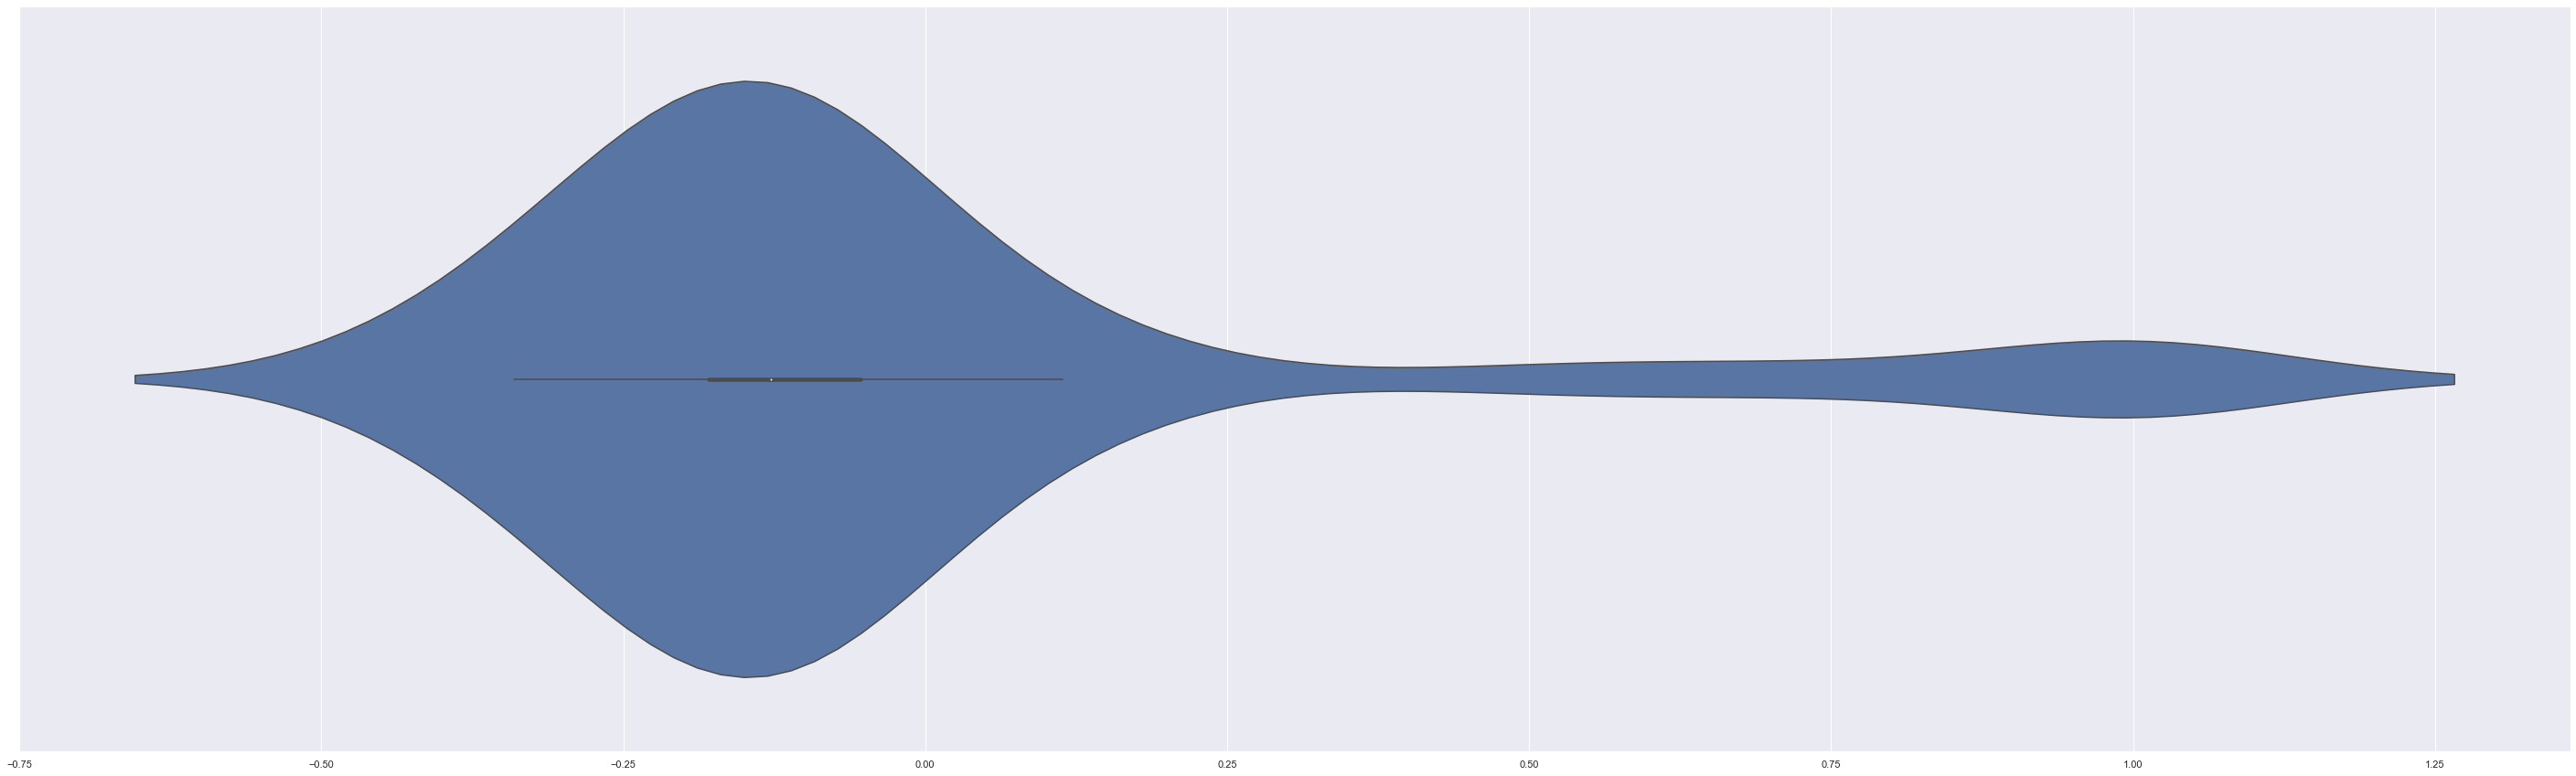

In [21]:
data = data.corr()

plt.figure(figsize=(50, 15))

sns.violinplot(data[(data >= 0.4) | (data <= 0.2)], 
            cmap='PRGn', vmax=1.0, vmin=-1.0, linewidths=0.2,
            annot=True, annot_kws={"size": 12}, square=True)
plt.show()

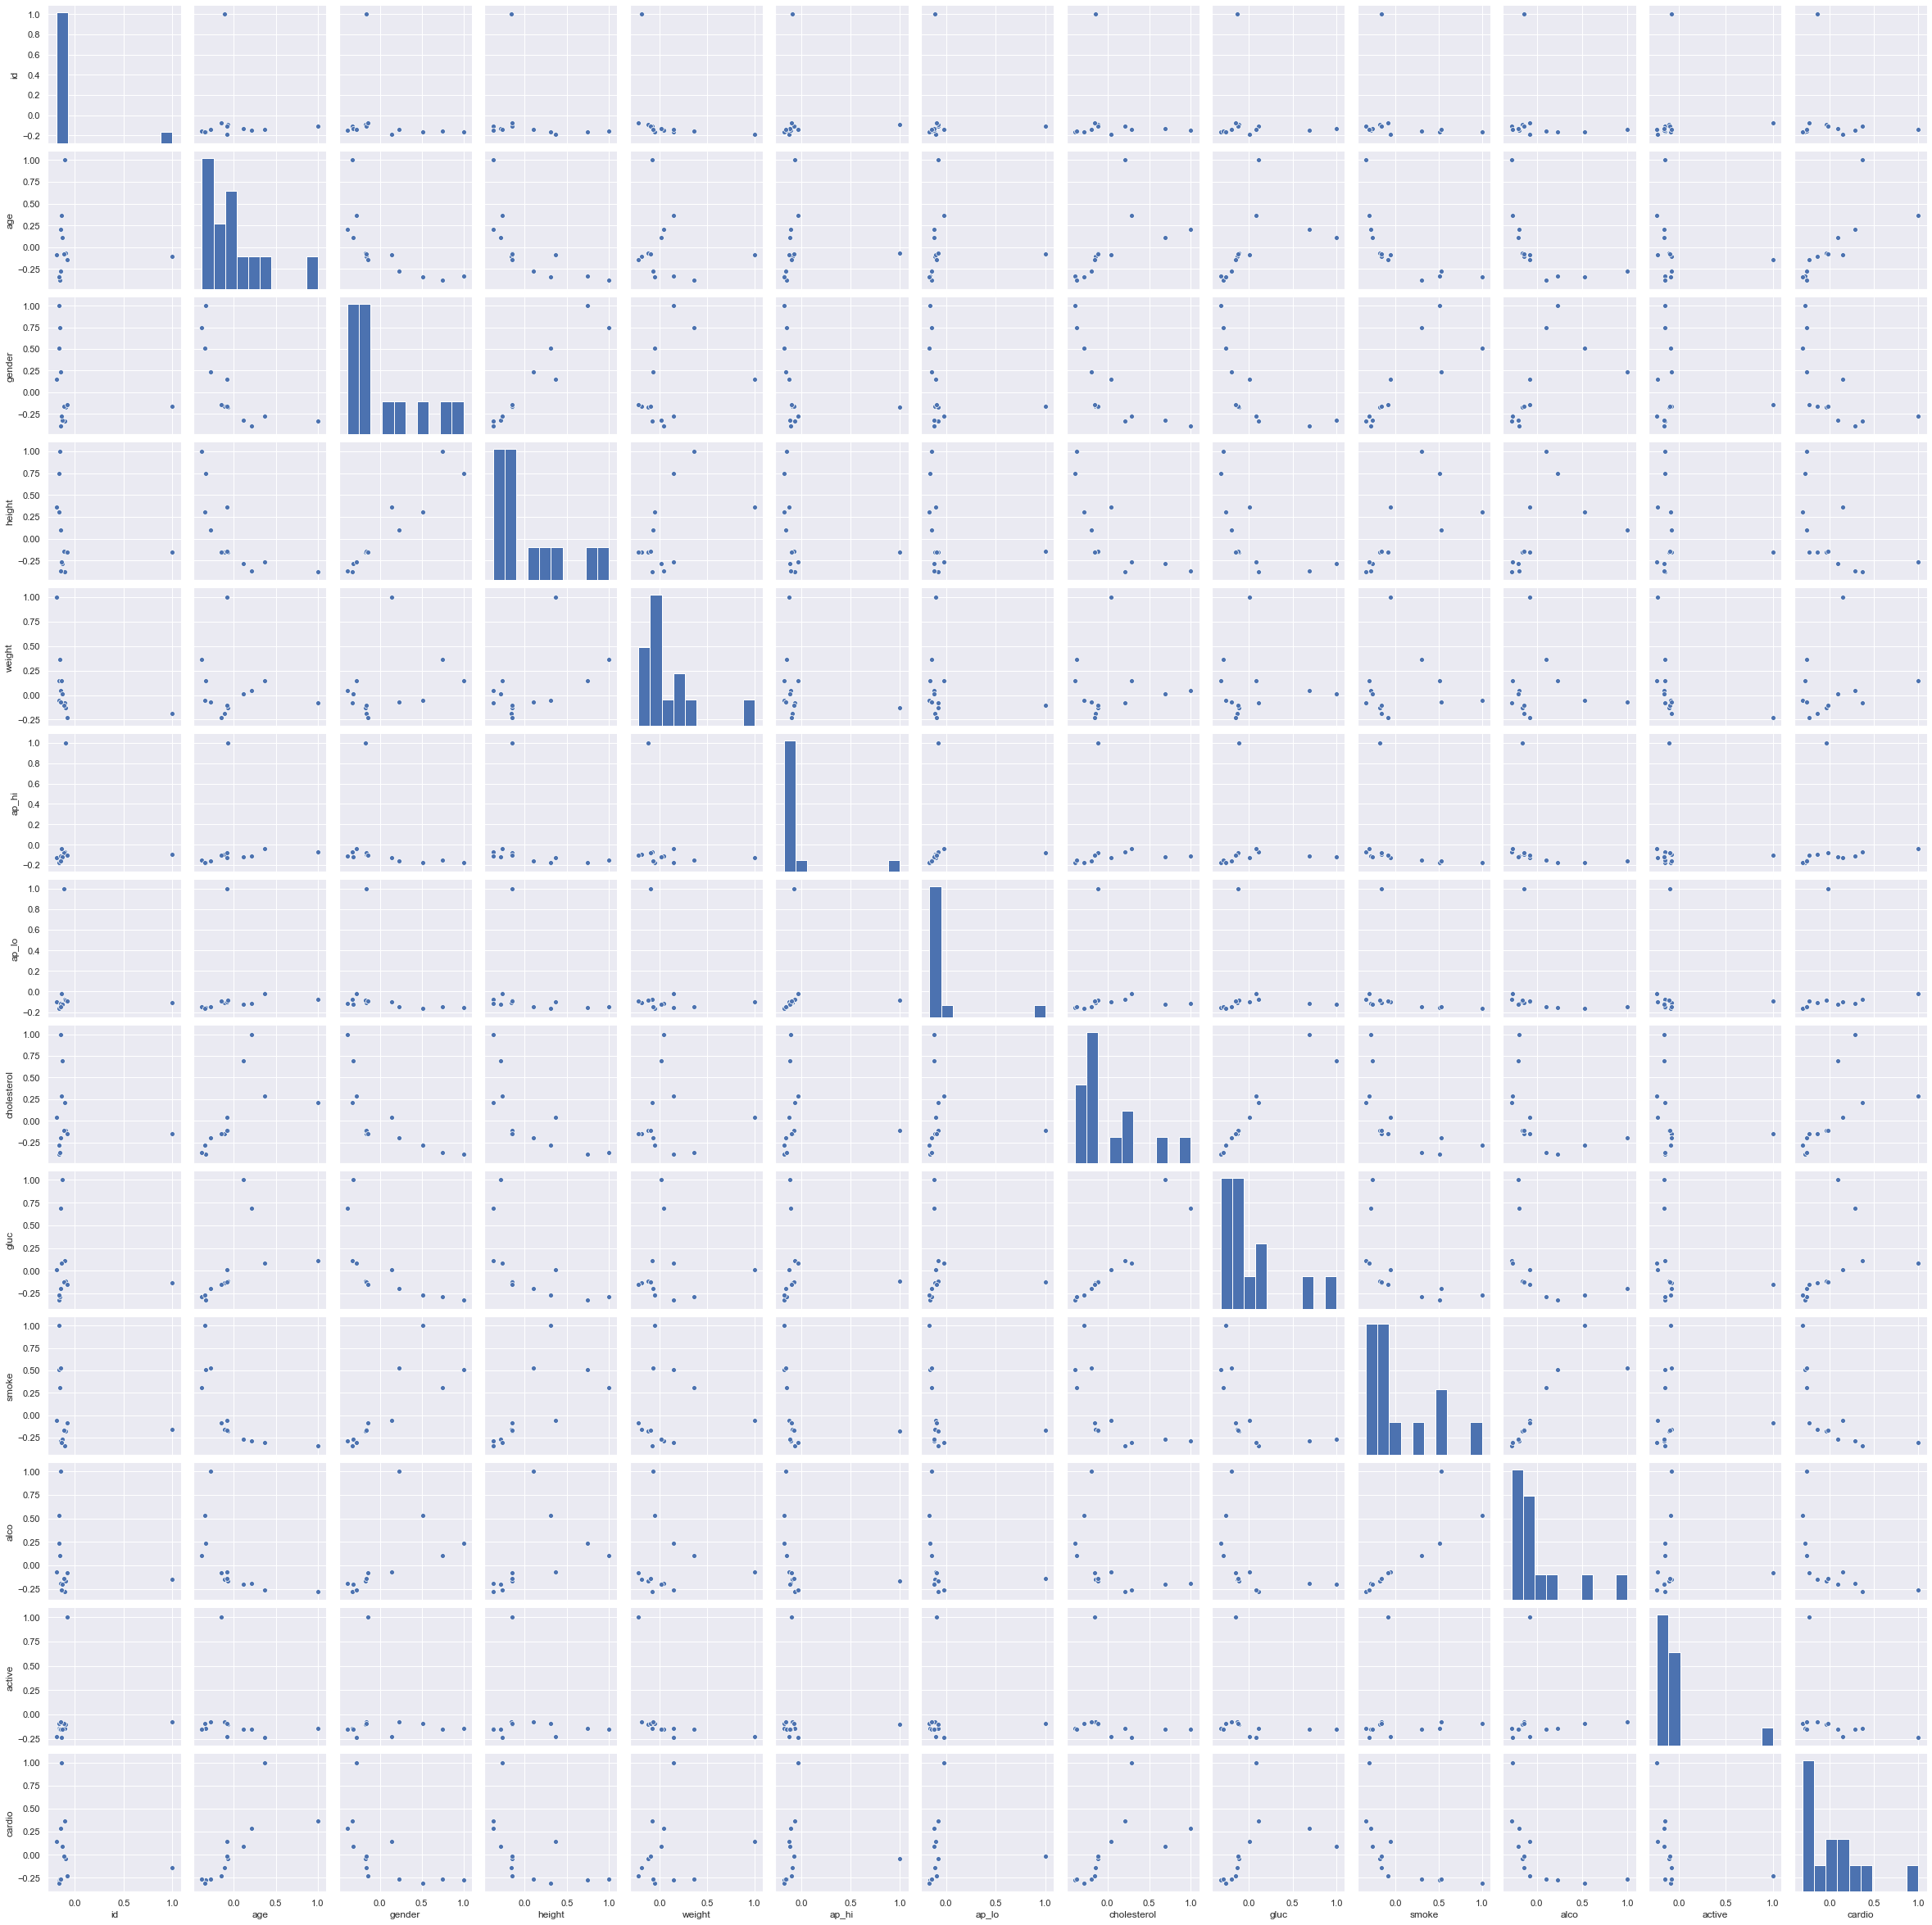

In [22]:
sns.pairplot(data)

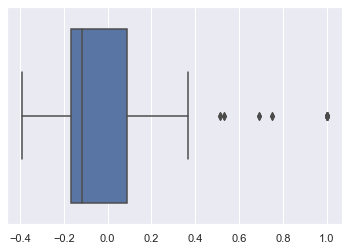

In [23]:
sns.boxplot(data)

In [24]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

[[3.44732463 0.26843814 0.49972128 0.48216009 0.82490474 0.20327506
  0.28018193 0.45544644 0.40968485 0.50131005 0.47778029 0.09463934
  0.47454045]
 [0.19112485 2.8042828  0.88617657 1.01070783 0.4781573  0.12902534
  0.17825363 0.43589234 0.24000017 0.94923632 0.85360088 0.31368871
  0.96211098]
 [0.37786985 0.88791705 2.20382411 1.67073851 0.25648003 0.4793234
  0.44217862 1.06307931 0.91545756 1.18378584 0.58405107 0.30637218
  0.85871598]
 [0.35307566 1.02153178 1.61878188 2.27023828 0.9594599  0.40462068
  0.40840578 1.01713348 0.82277572 0.66740038 0.21904557 0.32850021
  0.81837394]
 [0.46859079 0.2040987  0.21567046 0.75221557 3.01456734 0.31930789
  0.25212349 0.02072348 0.03228634 0.23008393 0.27909416 0.57495347
  0.33666693]
 [0.14822553 0.17020026 0.53035251 0.47800318 0.62329816 3.43263816
  0.17914055 0.37326317 0.37191168 0.54466841 0.52710175 0.16762443
  0.18512276]
 [0.20510782 0.19565146 0.49013825 0.46625935 0.53952896 0.16038217
  3.43633872 0.38094066 0.3888711

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 50,test_size=0.20)

# Logistic Regression

In [27]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
lr.score(x_train,y_train)

0.6476010101010101

In [29]:
pred=lr.predict(x_test)

In [30]:
pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [31]:
accuracy_score(pred,y_test)

0.6477887598297382

In [32]:
confusion_matrix(pred,y_test)

array([[4655, 2704],
       [2178, 4324]], dtype=int64)

# Random forest classifier

In [33]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
rfc.score(x_train,y_train)

0.9999819624819625

In [35]:
pred=rfc.predict(x_test)

In [36]:
pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [37]:
accuracy_score(pred,y_test)

0.7264266647428036

In [48]:
confusion_matrix(pred,y_test)

array([[4357, 2575],
       [2476, 4453]], dtype=int64)

In [50]:
#cross validation
cross_val_score(rfc,x, y, cv=6,scoring="r2").mean()

-0.36574479175706004

In [51]:
print(classification_report(y_test,pred))   #classification report

              precision    recall  f1-score   support

           0       0.63      0.64      0.63      6833
           1       0.64      0.63      0.64      7028

    accuracy                           0.64     13861
   macro avg       0.64      0.64      0.64     13861
weighted avg       0.64      0.64      0.64     13861



# Decision Tree Classifier

In [52]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
dtc.score(x_test,y_test)

0.6361012913931173

In [54]:
pred=dtc.predict(x_test)

In [55]:
pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [56]:
dtc.feature_importances_

array([0.19294173, 0.22839513, 0.01353454, 0.11153742, 0.12274068,
       0.22643006, 0.03525721, 0.02964264, 0.01501799, 0.00740667,
       0.00659007, 0.01050585])

In [57]:
accuracy_score(pred,y_test)

0.6361012913931173

In [58]:
cross_val_score(dtc,x, y, cv=6,scoring="r2").mean()

-0.6405475792350023

# Ada Boost

In [59]:
ada=AdaBoostClassifier(base_estimator=rfc,n_estimators=100)

In [60]:
ada.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [61]:
ada.score(x_train,y_train)

1.0

In [62]:
adar=ada.predict(x_test)

In [63]:
adar

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [64]:
accuracy_score(pred,y_test)

0.6361012913931173

# Grid Search CV

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier

calibrated_forest = CalibratedClassifierCV(
base_estimator=RandomForestClassifier(n_estimators=10))
param_grid = {
    'base_estimator__max_depth': [2, 4, 6, 8]}
search = GridSearchCV(calibrated_forest, param_grid, cv=5)
search.fit(x, y)
GridSearchCV(cv=5,
             estimator=CalibratedClassifierCV(...),
             param_grid={'base_estimator__max_depth': [2, 4, 6, 8]})

GridSearchCV(cv=5, error_score=nan,
             estimator=CalibratedClassifierCV(base_estimator=Ellipsis, cv=None,
                                              method='sigmoid'),
             iid='deprecated', n_jobs=None,
             param_grid={'base_estimator__max_depth': [2, 4, 6, 8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [72]:
cross_val_score(ada,x,y, cv= 5 , scoring='accuracy').mean()

0.6693577847174268

# Saving The Model 

In [78]:
from sklearn.externals import joblib  #save the file through joblib
joblib.dump(ada,'cvd.pkl')

['cvd.pkl']